## $\chi^2$ test to check Gaussianity of the CGF data vector

In [1]:
import os
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

plt.style.use(os.path.join(os.path.abspath('../'), 'plot_style.mplstyle'))
plt.rcParams['text.usetex'] = False

%load_ext autoreload
%autoreload 2

In [2]:
# Read small boxes measurements
r = 15

data_dir = Path('/pscratch/sd/m/mpinon/density/cov/')
data_fn = Path(data_dir) / 'cgf_r{:d}_cov_lhc_logbins.npy'.format(r)

lhc_cov_cgf = np.load(data_fn, allow_pickle=True,).item()

rebin = {'10': 4, '15': 8, '20': 8}
lhc_cov_cgf['lambda'] = lhc_cov_cgf['lambda'][::rebin[str(r)]]
lhc_cov_cgf['lhc_y'] = lhc_cov_cgf['lhc_y'][:, ::rebin[str(r)]]

lda = lhc_cov_cgf['lambda']
mask = {'10': (lda >= -200) & (lda <= -0.5), '15': (lda >= -500) & (lda <= -0.5), '20': (lda >= -500) & (lda <= -0.5)}
lda = lda[mask[str(r)]]
data = lhc_cov_cgf['lhc_y'][:, mask[str(r)]]

cov_cgf = np.cov(data, rowvar=False)
mean_cgf = np.mean(data, axis=0)
std_cgf = np.diag(cov_cgf)**0.5

In [3]:
lda

array([-398.10717055, -158.48931925,  -63.09573445,  -25.11886432,
        -10.        ,   -3.98107171,   -1.58489319,   -0.63095734])

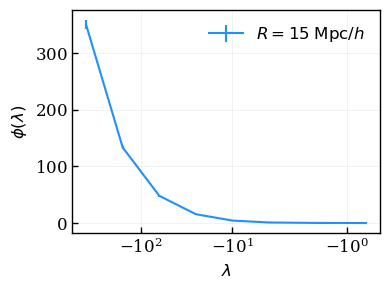

In [15]:
plt.figure(figsize=(4, 3))
plt.errorbar(lda, mean_cgf, std_cgf, label=r'$R = {} \; \mathrm{{Mpc}}/h$'.format(r))
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\phi(\lambda)$')
plt.xscale('symlog')
#plt.xlim(-10, 1)
#plt.ylim(0, 6)
plt.legend()
plt.show()

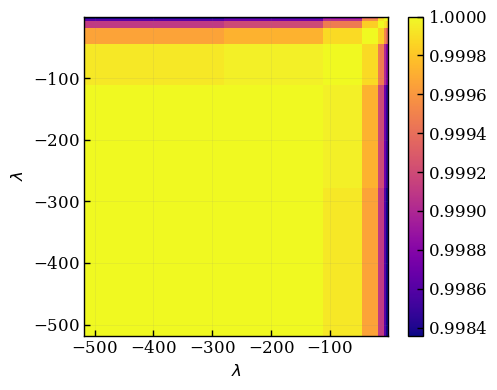

In [5]:
correlation_matrix = np.corrcoef(np.array(cov_cgf))
#print(correlation_matrix)

plt.figure(figsize=(5, 4))
plt.pcolor(lda, lda, correlation_matrix)
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\lambda$')
plt.colorbar()
plt.show()

In [6]:
np.linalg.matrix_rank(cov_cgf)

8

In [7]:
len(lda)

8

In [8]:
delta = data - mean_cgf
precmatrix = np.linalg.inv(cov_cgf)
var = np.diag(delta.dot(precmatrix.dot(delta.T)))

mask = var < 100
var = var[mask]

In [9]:
from numpy.random import multivariate_normal as mvn
gauss = mvn(mean=mean_cgf, cov=cov_cgf, size=10000)
delta_gauss = gauss - mean_cgf
gauss_var = np.diag(delta_gauss.dot(precmatrix.dot(delta_gauss.T)))

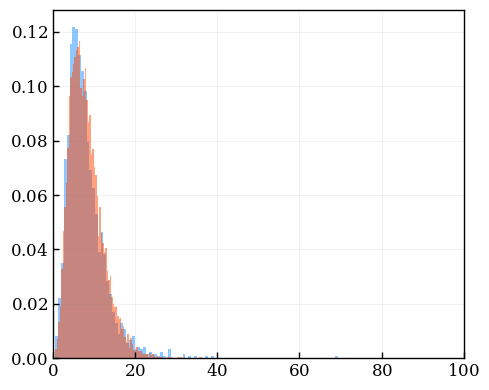

In [10]:
plt.figure(figsize=(5, 4))
plt.hist(var, bins=100, alpha=0.5, density=True)
plt.hist(gauss_var, bins=100, alpha=0.5, density=True)
plt.xlim(0, 100)
plt.show()